In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import pickle

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
#Link drive to colab
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

# !ls -l /content/drive/MyDrive/Fellowship/PicklesTrainTestVal/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## Import as dataframes before scaling and find on drive
X_test_0_0 = pd.read_pickle("/content/drive/MyDrive/Fellowship/PicklesTrainTestVal/AX_test.pkl")
X_train_0_0 = pd.read_pickle("/content/drive/MyDrive/Fellowship/PicklesTrainTestVal/AX_train.pkl")
# X_val = pd.read_pickle("AX_val.pkl")
y_test = pd.read_pickle("/content/drive/MyDrive/Fellowship/PicklesTrainTestVal/Ay_test.pkl")
y_train = pd.read_pickle("/content/drive/MyDrive/Fellowship/PicklesTrainTestVal/Ay_train.pkl")
# y_val = pd.read_pickle("Ay_val.pkl")

In [4]:
# Drop if the incoming flight is delayed as a feature
X_train_0 = X_train_0_0.drop(['INCOMING_Delay'], axis = 1)
X_test_0 = X_test_0_0.drop(['INCOMING_Delay'], axis = 1)

In [5]:
# Free up ram
del X_train_0_0, X_test_0_0

In [6]:
# Standard Scaler
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# Note, Fit scalar to training data and apply the scalar to the testing data
# Reason: Testing data isn't know for real world application of project
X_train = scaler.fit_transform(X_train_0) # This is the correct way of doing it
X_test = scaler.transform(X_test_0)

In [7]:
# Delete variables to free up ram
del X_test_0, X_train_0

In [8]:
# Choose Model, train, test
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

training_predict = clf.predict(X_train)
testing_predict = clf.predict(X_test)

training_accuracy = accuracy_score(y_train, training_predict)
testing_accuracy = accuracy_score(y_test, testing_predict)

print("Training Accuracy: {:.3}%".format(training_accuracy * 100))
print("Testing Accuracy: {:.3}%".format(testing_accuracy * 100))

Training Accuracy: 70.9%
Testing Accuracy: 68.4%


In [9]:
# Print confusin matrix and classification report
clf_out = clf.predict(X_test)
print(confusion_matrix(y_test, clf_out))
print(classification_report(y_test, clf_out))

[[496090  84476]
 [209505 141631]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77    580566
           1       0.63      0.40      0.49    351136

    accuracy                           0.68    931702
   macro avg       0.66      0.63      0.63    931702
weighted avg       0.67      0.68      0.67    931702



In [10]:
y_predict = clf.predict_proba(X_test)

In [11]:
# take the second column because the classifier outputs scores for
# the 0 class as well
predict = y_predict[:,1]

In [12]:
# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = metrics.roc_curve(y_test, predict)

auc_score = metrics.auc(fpr, tpr)

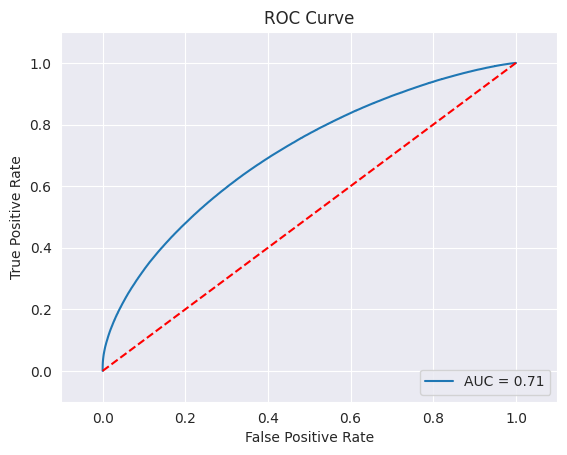

In [13]:
# clear current figure
plt.clf()

plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
# it's helpful to add a diagonal to indicate where chance
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()